![](https://user-images.githubusercontent.com/88978849/209463790-aabfa5a1-83c7-4e86-976d-64824c41de04.png)

### About the dataset
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. **For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera**. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

### Goals:
1. Develop a **multi-class classifier** to accurately classify beans into their respective types: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira.
2. Implement **ensemble** methods (e.g., Random Forest, Gradient Boosting) to optimize model performance.
3. Apply **deep neural networks** with logistic regression to achieve **multi-layer perceptron learning** and explore transfer learning techniques.
4. **Evaluate model accuracy** and **assess the risk of overfitting, through techniques like **cross validation** and **early stopping**.

## Importing Data

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [7]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## EDA

### 1. Use "Area" to visually classify beans

Let's see if we can try to use different features to classify our beans into their corresponding categories. We will use the same color palette for each kind of bean. 

In [11]:
# Import libraries for visuaization
import matplotlib.pyplot as plt
import seaborn as sns

# Define a consistent color palette for the classes
palette = {
    'SEKER': '#1f77b4',     # blue
    'BARBUNYA': '#ff7f0e',  # orange
    'BOMBAY': '#2ca02c',    # green
    'CALI': '#d62728',      # red
    'HOROZ': '#9467bd',     # purple
    'SIRA': '#8c564b',      # brown
    'DERMASON': '#e377c2',  # pink
}

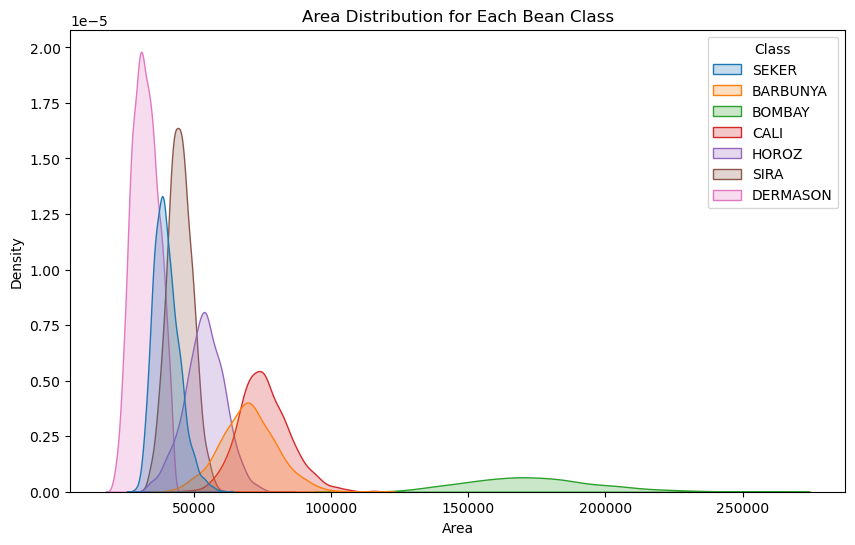

In [12]:
# Plot the distribution of "Area" column for each Class
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Area', hue='Class', fill=True)
plt.title('Area Distribution for Each Bean Class')
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()

### 2. Use both "Area" and 'Perimeter' to visaully classify beana

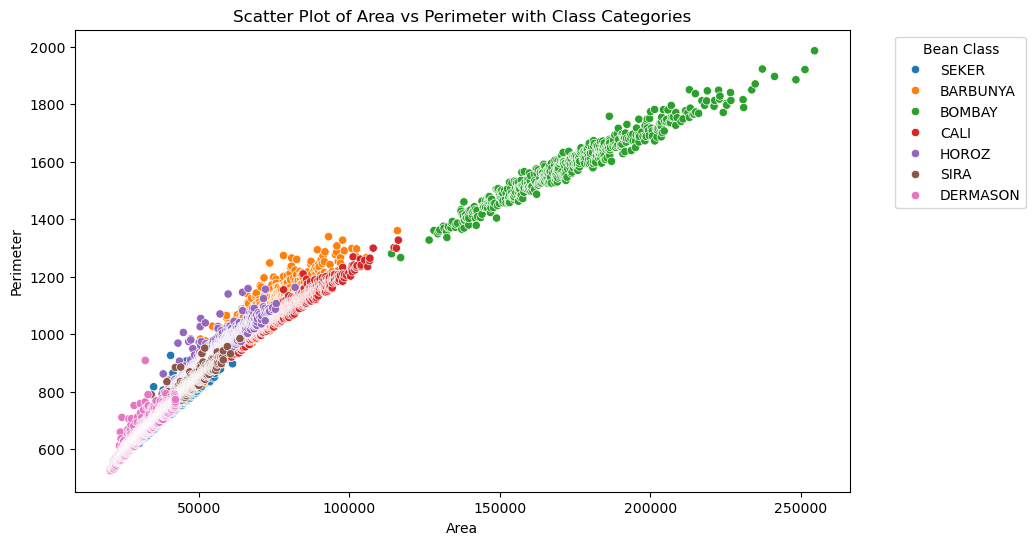

In [14]:
# PLot the scatter plot using both "Area" and "Perimeter" for each class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Perimeter', hue='Class', palette=palette)
plt.title('Scatter Plot of Area vs Perimeter with Class Categories')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend(title='Bean Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**From the graph, it is hard to tell which bean belongs to which category, except Bombay.** 

We will try to select more features like `MajorAxisLength`, `MinorAxisLength`, `Eccentricity`, `roundness` and see whether any of them can provide better decision boundries.

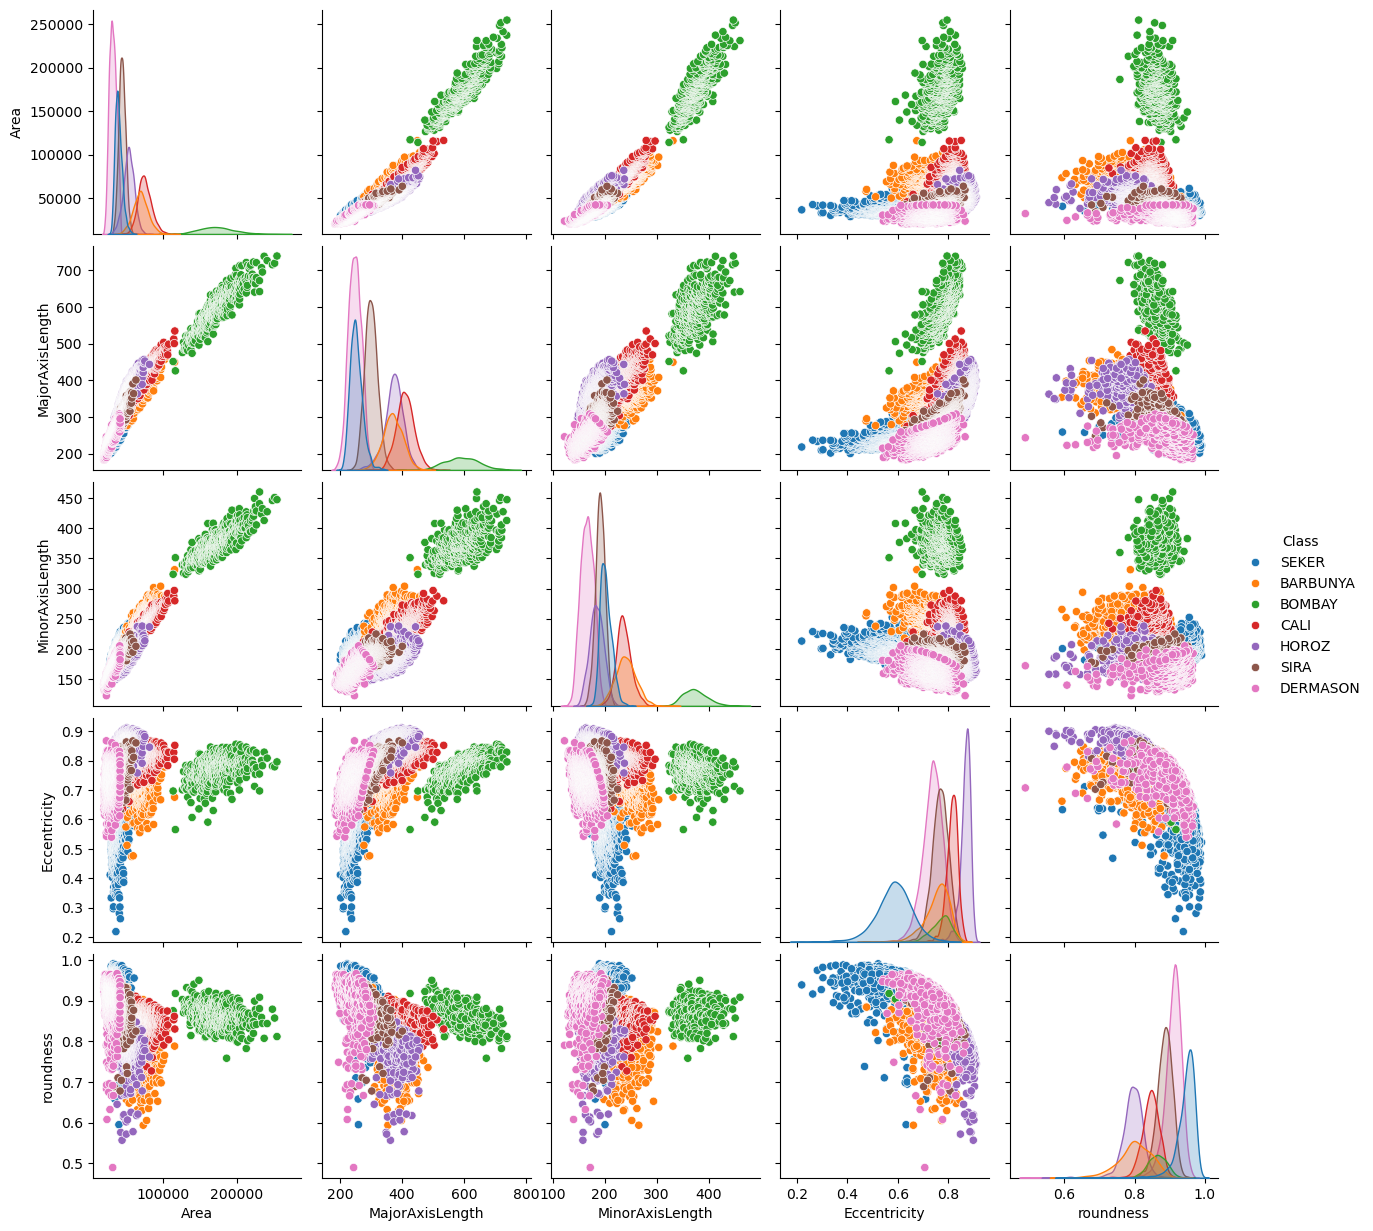

In [16]:
sns.pairplot(
   df,
   vars=["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "roundness"],
   hue="Class",
)

This is definitely overwhelming for one to identify exactly what common characteristics each bean holds!

**Therefore, we need a more intelligent learnig algrithm to help us select features and make predictions on the categories — which is also known as the 'decision tree'.**

## Binary-Class Classification with Information Gain

In a decision tree, we decide if a node will be split or not by looking at the **information gain** that split would give us. (Image of video IG)

Where 

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

Remember that log here is defined to be in base 2. Run the code block below to see by yourself how the entropy. $H(p)$ behaves while $p$ varies.

Note that the H attains its higher value when $p = 0.5$. This means that the probability of event is $0.5$. And its minimum value is attained in $p = 0$ and $p = 1$, i.e., the probability of the event happening is totally predictable. Thus, the entropy shows the degree of predictability of an event.

## Multi-Class Classification with Information Gain

In multi-class classification, the process of calculating information gain is similar to the binary case but adjusted for multiple classes. For example, consider we have three classes: "Cat", "Dog", and "Rabbit".

#### Entropy Calculation for Multi-Class

The entropy formula for three classes is:

$$
H(p) = - \left( p_{\text{cat}} \log_2(p_{\text{cat}}) + p_{\text{dog}} \log_2(p_{\text{dog}}) + p_{\text{rabbit}} \log_2(p_{\text{rabbit}}) \right)
$$

Where:
- ( p_{\text{cat}}, p_{\text{dog}}, p_{\text{rabbit}} \) are the proportions of each class in a given node.

#### Example Scenario: Parent Node Entropy

Suppose we have a dataset of 9 animals:
- 4 Cats, 
- 3 Dogs, 
- 2 Rabbits.

The probability for each class in the parent node is:

$$
p_{\text{cat}} = \frac{4}{9}, \quad p_{\text{dog}} = \frac{3}{9}, \quad p_{\text{rabbit}} = \frac{2}{9}
$$

The entropy of the parent node is calculated as:

$$
H_{\text{parent}} = - \left( \frac{4}{9} \log_2\left(\frac{4}{9}\right) + \frac{3}{9} \log_2\left(\frac{3}{9}\right) + \frac{2}{9} \log_2\left(\frac{2}{9}\right) \right)
$$

#### Splitting the Node: Left and Right Child Nodes

Let's assume we split the parent node based on an attribute like "Ear Shape." This results in two child nodes.

- **Left Child Node:**
  - 3 Cats, 1 Dog, 0 Rabbits (Total = 4).
  - The probabilities are: 
  $$ p_{\text{cat}} = \frac{3}{4}, \quad p_{\text{dog}} = \frac{1}{4}, \quad p_{\text{rabbit}} = 0 $$

  The entropy for the left child node is:
  
  $$
  H_{\text{left}} = - \left( \frac{3}{4} \log_2\left(\frac{3}{4}\right) + \frac{1}{4} \log_2\left(\frac{1}{4}\right) \right) = 0.81
  $$

- **Right Child Node:**
  - 1 Cat, 2 Dogs, 2 Rabbits (Total = 5).
  - The probabilities are: 
  $$ p_{\text{cat}} = \frac{1}{5}, \quad p_{\text{dog}} = \frac{2}{5}, \quad p_{\text{rabbit}} = \frac{2}{5} $$

  The entropy for the right child node is:

  $$
  H_{\text{right}} = - \left( \frac{1}{5} \log_2\left(\frac{1}{5}\right) + \frac{2}{5} \log_2\left(\frac{2}{5}\right) + \frac{2}{5} \log_2\left(\frac{2}{5}\right) \right) = 1.37
  $$

#### Information Gain Calculation

Now, we calculate the information gain from this split.

The formula for Information Gain (IG) is:

$$
\text{Information Gain} = H(p_{\text{parent}}) - \left( w_{\text{left}} H(p_{\text{left}}) + w_{\text{right}} H(p_{\text{right}}) \right)
$$

Where:
- \( H(p_{\text{parent}}) \) is the entropy of the parent node.
- \( w_{\text{left}} \) is the proportion of samples in the left child node: \( \frac{4}{9} \).
- \( w_{\text{right}} \) is the proportion of samples in the right child node: \( \frac{5}{9} \).
- \( H(p_{\text{left}}) \) and \( H(p_{\text{right}}) \) are the entropies of the left and right child nodes.

Substitute the values:

$$
\text{IG} = 1.53 - \left( \frac{4}{9} \times 0.81 + \frac{5}{9} \times 1.37 \right)
$$

Simplifying:

$$
\text{IG} = 1.53 - \left( 0.36 + 0.76 \right) = 1.53 - 1.12 = 0.41
$$

Thus, the information gain from this split is 0.41.


To shows how entropy behaves for a system with three classes, we can create a Entropy Surface Plot where:

- The **x-axis** represents the probability of Class 1 (\(p_1\)).
- The **y-axis** represents the probability of Class 2 (\(p_2\)).
- The probability of Class 3 (\(p_3\)) is implicitly calculated as \(p_3 = 1 - p_1 - p_2\).

The highest point on the surface (around 1.585) corresponds to the case where all three classes are equally likely (i.e., \(p_1 = p_2 = p_3 = \frac{1}{3}\)), which results in maximum entropy. As one class dominates or the distribution of probabilities becomes less balanced, the entropy decreases.

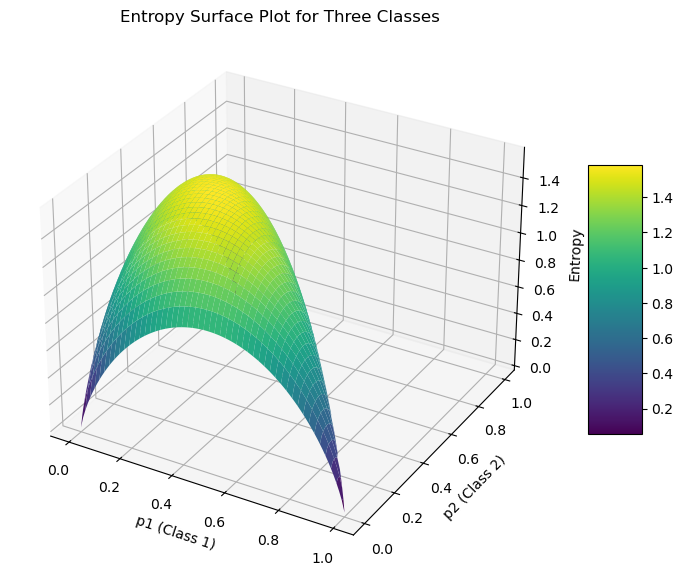

In [23]:
# Entropy function for three classes
def entropy(p1, p2):
    p3 = 1 - p1 - p2  # Since the total probability must sum to 1
    entropy = 0
    for p in [p1, p2, p3]:
        if p > 0:  # Avoid log(0)
            entropy -= p * np.log2(p)
    return entropy

# Generate values for p1 and p2
p1_values = np.linspace(0, 1, 100)
p2_values = np.linspace(0, 1, 100)

# Meshgrid for p1 and p2
P1, P2 = np.meshgrid(p1_values, p2_values)

# Calculate entropy for each combination of p1 and p2
entropy_values = np.array([[entropy(p1, p2) if p1 + p2 <= 1 else np.nan for p1 in p1_values] for p2 in p2_values])

# Plotting the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(P1, P2, entropy_values, cmap='viridis')

# Labels and title
ax.set_xlabel('p1 (Class 1)')
ax.set_ylabel('p2 (Class 2)')
ax.set_zlabel('Entropy')
ax.set_title('Entropy Surface Plot for Three Classes')

# Add color bar to show the scale of entropy values
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


## Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42 ## Pass it to every sklearn call so we ensure reproducibility

In [26]:
# Remove the target variable
features = [x for x in df.columns if x not in 'Class']
features

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

In [27]:
# Split the data into train and test dataset
X_train, X_val, y_train, y_val = train_test_split(df[features], df['Class'], train_size = 0.8, random_state = RANDOM_STATE)

In [28]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')

train samples: 10888
validation samples: 2723


## Buidling the Decision Tree Model

There are several hyperparameters in the Decision Tree object from Scikit-learn. The hyperparameters we will use and investigate here are:
1. `min_samples_split`: The minimum number of samples required to split an internal node. Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
2. `max_depth`: The maximum depth of the tree. Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

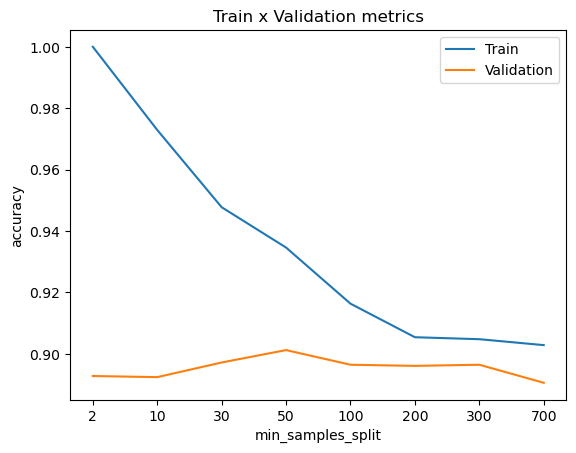

In [32]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    # Fit the model at the same time we define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Note how increasing the the number of `min_samples_split` reduces overfitting.
- Increasing `min_samples_split` from 30 to 50, and from 100 to 300, **even though it does not improve the validation accuracy, it brings the training accuracy closer to it, showing a reduction in overfitting.**

Let's do the same experiment with `max_depth`.

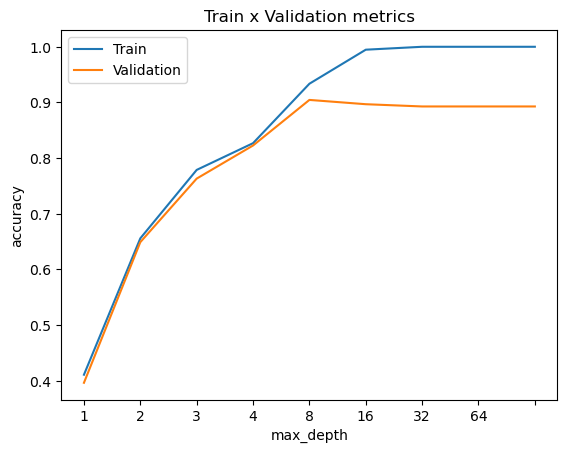

In [34]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:
    # Fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

From the graph, we can see that:

1. **Initial Improvement with Increasing Depth**: At lower max_depth values (1-8), both the training and validation accuracies improve together, indicating that increasing the complexity of the tree helps the model better capture the patterns in the data without overfitting. The model generalizes well across both the training and validation datasets.

2. **Peak Performance and Overfitting**: As the depth continues to increase (from 8 onwards), the training accuracy stays high (near 1.0), but the validation accuracy starts to decline slightly or plateaus. **This is a classic sign of overfitting: the model is becoming too complex, fitting the noise in the training data rather than generalizing to unseen data.**

3. **No Further Improvement Beyond Depth of 8**: The best balance between training and validation performance is around a max_depth of 8. Beyond this point, deeper trees (max_depth values of 16, 32, etc.) do not provide any improvement to validation accuracy, and in fact, validation accuracy starts to decrease slightly, while training accuracy remains very high.

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 8`
- `min_samples_split = 200` 

In [37]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 200,
                                             max_depth = 8,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [38]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9044
Metrics validation:
	Accuracy score: 0.8964


No sign of overfitting, even though the metrics are acceptable, but bet we can do bettter.

## Random Forest

### Concept

1. Bagging: In Random Forest, bagging involves creating multiple decision trees by sampling subsets of the training data (with replacement) for each tree. This helps reduce variance and prevent overfitting.

2. Random Subset of Features (Feature Bagging): In addition to using a random subset of data samples for each tree, Random Forest also randomly selects a subset of features at each split. This further decorrelates the trees and enhances the diversity of the model, improving generalization.

### Implementation

Now let's try the Random Forest algorithm also, using the Scikit-learn implementation. All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an **ensemble** of many Decision Trees.

One additional hyperparameter for Random Forest is called `n_estimators` which is **the number of Decision Trees that make up the Random Forest**.
Remember that for a Random Forest, **we randomly choose a subset of the features AND randomly choose a subset of the training examples** to train each individual tree.

For modeling, if 𝑛 is the number of features,
 - Ee will randomly select √𝑛 of these features to train each individual tree.
 - Note that you can modify this by setting the max_features parameter.

We will run the same script again, but with another parameter, n_estimators, where we will choose between 10, 50, and 100. The default is 100.

In [43]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10, 50, 100, 500] 

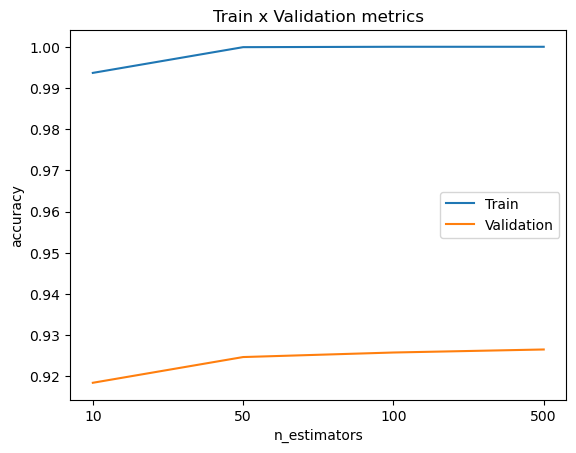

In [44]:
from sklearn.ensemble import RandomForestClassifier

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:
    # Fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [45]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             min_samples_split = 200,
                                             max_depth = 8).fit(X_train,y_train)

In [46]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9139
Metrics validation:
	Accuracy score: 0.9108


Note that we are searching for the best value one hyperparameter while leaving the other hyperparameters at their default values. **Ideally, we would want to check every combination of values for every hyperparameter that we are tuning.**

If we have 3 hyperparameters, and each hyperparameter has 4 values to try out, we should have a total of 4 x 4 x 4 = 64 combinations to try.
When we only modify one hyperparameter while leaving the rest as their default value, we are trying 4 + 4 + 4 = 12 results.
**To try out all combinations, we can use a sklearn implementation called GridSearchCV. GridSearchCV has a refit parameter that will automatically refit a model on the best combination so we will not need to program it explicitly.**

In [48]:
max_features_list = ['sqrt', 'log2', None]

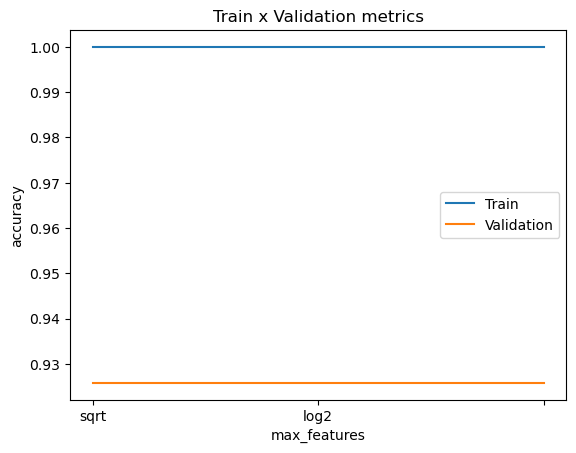

In [49]:
accuracy_list_train = []
accuracy_list_val = []

for max_features in max_features_list:
    # Fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_features = max_features,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_features_list)),labels=max_features_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [50]:
random_forest_model = RandomForestClassifier(max_features = 'sqrt',
                                             n_estimators = 50,
                                             min_samples_split = 200,
                                             max_depth = 8).fit(X_train,y_train)

In [51]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9172
Metrics validation:
	Accuracy score: 0.9093


In [54]:
# import time
# from sklearn.model_selection import GridSearchCV

# # Parameter grid for RandomForestClassifier
# param_grid = {
#     'n_estimators': [10, 20, 50, 100],
#     'max_features': ['sqrt', 0.2, 0.5, None],  # Tuning max_features
#     'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
#     'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, None]
# }

# # Create RandomForestClassifier
# rf = RandomForestClassifier(random_state=RANDOM_STATE)

# # Set up the grid search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Record the start time
# start_time = time.time()

# # Fit the model with the training data
# grid_search.fit(X_train, y_train)

# # Record the end time and calculate the duration
# end_time = time.time()
# duration = end_time - start_time

# # Print the best parameters, accuracy score, and total duration
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy score: ", grid_search.best_score_)
# print(f"Grid search took {duration:.2f} seconds to run.")

Is it normal for grid search to run for a long time?
Yes, it is normal for GridSearchCV to take a long time, especially if you are:

1. **Searching through a large hyperparameter space**: You have multiple values for each hyperparameter (n_estimators, max_features, etc.), and the grid search will try every combination, leading to many model evaluations.

2. **Using a computationally intensive model**: Random forests involve training many decision trees (based on n_estimators), which can be computationally expensive, especially when tested with higher values like 500 estimators.

3. **Large dataset**: If X_train has many samples or features, the training process can be slower because each tree must fit this larger dataset.

Higher cross-validation folds: You're using 5-fold cross-validation (cv=5), which means for each combination of parameters, the model will be trained and validated 5 times on different subsets of the data.

## XGBoost

Next is the Gradient Boosting model, called XGBoost. The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error.

The model has the same parameters as a decision tree, plus the learning rate. The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

In [58]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [59]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [60]:
X_train_eval

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
13569,41643,768.896,303.110162,175.355685,1.728545,0.815667,42039,230.264010,0.737959,0.990580,0.885150,0.759671,0.007279,0.001495,0.577100,0.997543
6052,49815,909.749,384.342718,165.547105,2.321652,0.902482,50364,251.846040,0.766868,0.989099,0.756357,0.655264,0.007715,0.000877,0.429371,0.996850
3178,80951,1107.182,395.538820,261.613460,1.511921,0.750024,82239,321.045191,0.779927,0.984338,0.829839,0.811665,0.004886,0.001308,0.658801,0.996055
3192,81584,1103.915,381.611168,274.442138,1.390498,0.694837,82696,322.297960,0.763838,0.986553,0.841286,0.844572,0.004678,0.001468,0.713301,0.991844
9499,48363,815.384,297.687339,207.680047,1.433394,0.716444,48995,248.148512,0.724084,0.987101,0.914111,0.833588,0.006155,0.001833,0.694868,0.996020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,83266,1117.778,448.473710,237.747098,1.886348,0.847920,84030,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319
13418,39857,755.392,283.623668,179.430885,1.580685,0.774448,40330,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183
5390,90004,1156.599,456.836383,252.353553,1.810303,0.833583,90790,338.521273,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035
860,38426,711.412,246.696608,198.555755,1.242455,0.593467,38799,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826


In [61]:
y_train_eval

13569    DERMASON
6052        HOROZ
3178     BARBUNYA
3192     BARBUNYA
9499         SIRA
           ...   
5191         CALI
13418    DERMASON
5390         CALI
860         SEKER
7270        HOROZ
Name: Class, Length: 2178, dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform them to integers
y_train_fit_encoded = label_encoder.fit_transform(y_train_fit)
y_train_eval_encoded = label_encoder.transform(y_train_eval)

Note some of the parameters:
- `eval_set = [(X_train_eval,y_train_eval)]`:Here we must pass a list to the eval_set, because you can have several different tuples of eval sets. 
- `early_stopping_rounds`: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.
  - The model keeps track of the round with the best performance (lowest evaluation metric).  For example, let's say round 16 has the lowest evaluation metric so far.
  - Each successive round's evaluation metric is compared to the best metric.  If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
  - The model is returned at its last state when training terminated, not its state during the best round.  For example, if the model stops at round 26, but the best round was 16, the model's training state at round 26 is returned, not round 16.
  - Note that this is different from returning the model's "best" state (from when the evaluation metric was the lowest).

In [64]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=200,           # Number of boosting rounds
    learning_rate=0.1,          # Learning rate
    verbosity=1,                # Verbosity level
    random_state=RANDOM_STATE,   # For reproducibility
    early_stopping_rounds=10,  # Early stopping if no improvement in 10 rounds
)

# Fit the model using the encoded labels
xgb_model.fit(
    X_train_fit, 
    y_train_fit_encoded, 
    eval_set=[(X_train_eval, y_train_eval_encoded)],  # Evaluation set for monitoring
    verbose=True               # Print logs during training
)

[0]	validation_0-mlogloss:1.66003
[1]	validation_0-mlogloss:1.45537
[2]	validation_0-mlogloss:1.29510
[3]	validation_0-mlogloss:1.16359
[4]	validation_0-mlogloss:1.05445
[5]	validation_0-mlogloss:0.96079
[6]	validation_0-mlogloss:0.88006
[7]	validation_0-mlogloss:0.81070
[8]	validation_0-mlogloss:0.74933
[9]	validation_0-mlogloss:0.69513
[10]	validation_0-mlogloss:0.64633
[11]	validation_0-mlogloss:0.60298
[12]	validation_0-mlogloss:0.56448
[13]	validation_0-mlogloss:0.52964
[14]	validation_0-mlogloss:0.49850
[15]	validation_0-mlogloss:0.47049
[16]	validation_0-mlogloss:0.44529
[17]	validation_0-mlogloss:0.42269
[18]	validation_0-mlogloss:0.40232
[19]	validation_0-mlogloss:0.38417
[20]	validation_0-mlogloss:0.36764
[21]	validation_0-mlogloss:0.35247
[22]	validation_0-mlogloss:0.33883
[23]	validation_0-mlogloss:0.32655
[24]	validation_0-mlogloss:0.31533
[25]	validation_0-mlogloss:0.30466
[26]	validation_0-mlogloss:0.29524
[27]	validation_0-mlogloss:0.28657
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
xgb_model.best_iteration

95

Even though we initialized the model to allow up to 200 estimators, the algorithm only fit 95 estimators (over 95 rounds of training).

To see why, let's look for the round of training that had the best performance (lowest evaluation metric).  We can either view the validation log loss metrics that were output above, or view the model's `.best_iteration` attribute:

In [67]:
# Predict on the training and test sets
y_train_pred_encoded = xgb_model.predict(X_train_fit)
y_val_pred_encoded = xgb_model.predict(X_val)

# Calculate accuracy for the training set using encoded labels
train_accuracy = accuracy_score(y_train_fit_encoded, y_train_pred_encoded)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate accuracy for the test set using encoded labels
test_accuracy = accuracy_score(label_encoder.transform(y_val), y_val_pred_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9796
Test Accuracy: 0.9266


*Note:
Unlike algorithms like XGBClassifier, decision trees don't use gradient-based optimization. Decision trees operate by recursively splitting the dataset based on feature values and minimizing an impurity metric (such as Gini impurity or entropy). Therefore, they don't require numeric labels for these calculations.
Since there are no gradients to compute, string labels work fine as long as the decision tree can classify them into distinct categories.

Examples of When Encoding is Required:
1. Tree-based methods like XGBoost, LightGBM, CatBoost: These algorithms require numeric encoding of the target variable because they rely on gradients and optimizations that are not compatible with string labels.
2. Neural networks: Most deep learning frameworks (like Keras, TensorFlow, PyTorch) also require numeric labels. For classification tasks, it's common to one-hot encode or label encode the target values.

## Model Evaluation: Random Forest VS. XGBoost

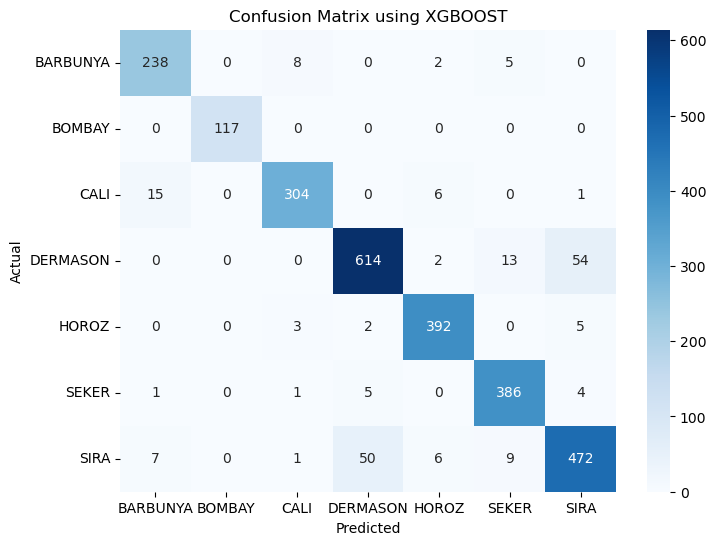

In [125]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual class names
class_names = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

# Compute the confusion matrix
cm = confusion_matrix(y_val_pred_encoded, label_encoder.transform(y_val))

# Plot the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using XGBOOST')
plt.show()

In [127]:
# Predict on the training and test sets
y_train_pred = random_forest_model.predict(X_train)
y_val_pred = random_forest_model.predict(X_val)

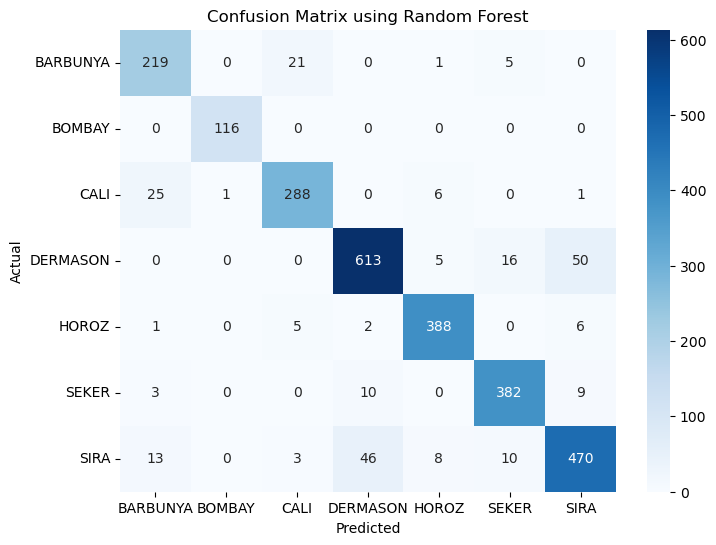

In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_val_pred, y_val)

# Plot the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_val_pred), yticklabels=np.unique(y_val))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using Random Forest')
plt.show()

From these two plots, we can see that:
1. XGBoost model appears to maintain good precision across all classes, with fewer major misclassifications.
2. Random Forest seems to struggle more with distinguishing between some classes like 'CALI', 'SEKER', and 'SIRA', leading to larger clusters of misclassified data.

#### Conclusion:

XGBoost outperforms Random Forest in this dry bean classification task due to its **ability to minimize misclassifications by iteratively correcting errors made in previous iterations**. This boosting mechanism allows for more precise corrections of classification errors, resulting in higher overall accuracy compared to Random Forest.

## Logisitc Regression as A Neural Network

For a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 

**However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.** 
This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


### Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.

Therefore, a logistic regression model that applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$